In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Custom imports
from matplotlib.cm import jet
from math import ceil, pi
from scipy.stats import poisson, norm, binom
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

In [3]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Prof. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

# Chapter 9

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. **Probability and confidence level**
10. Limit setting
11. Introduction to multivariate analysis techniques

## Topics

**[9 Probability and confidence level](#9-Probability-and-confidence-level)**

**[9.1 Probability](#9.1-Probability)**
- 9.1.1 Empirical probability - The limit of a frequency
- 9.1.2 Bayesian statistics
- 9.1.3 Subjective probability

**[9.2 Confidence intervals in estimation](#9.2-Confidence-intervals-in-estimation)**
- 9.2.1 Confidence belt construction
- 9.2.2 Interpretation
- 9.2.3 Gaussian confidence intervals

**[9.3 Examples of confidence intervals](#9.3-Examples-of-confidence-intervals)**
- 9.3.1 Binomial confidence intervals
- 9.3.2 Poisson confidence intervals

## 9 Probability and confidence level

### 9.1 Probability

#### 9.1.1 Empirical probability - The limit of a frequency

Consider an experiment that is executed $N$ times. The outcome $A$ (this could be a single event or a set of events) occurs in $M$ of these cases. As $N\to \infty$, the ratio $M/N$ tends to a limit, which is defined as the _probability_ $P(A)$ of $A$.

The experiment may be repeated $N$ times sequentially or $N$ identical experiments may be carried out in parallel. The set of all $N$ outcomes is called _collective_ or _ensemble_.

<div class="example">Example: Repeating one experiment</div>

An example for repeating one experiment is the double-slit experiment in which the same double slit is bombarded many times with particles and a distribution builds up on the screen.
This distribution corresponds to the probability of observing a particle at a given place on the screen.

<img src="images/DoubleSlit.png" width=60% >

Source <a href="https://commons.wikimedia.org/wiki/File:Two-Slit_Experiment_Light.svg">Wikimedia/inductiveload</a>

<div class="example">Example: Independent experiments</div>

In particle physics colliders produce millions of particle collisions per second.

What is studied in the end is the outcome of the ensemble.

In addition, sometimes experiments two experiments are conducted in parallel, here ATLAS and CMS.

<img src="images/Higgs24mu.png" width=49% > <img src="images/Higgs24l.png" width=49% >

Sources <a href="https://cds.cern.ch/record/1459496">CERN/ATLAS</a>, <a href="http://inspirehep.net/record/1608162">CMS, JHEP 1711 (2017) 047</a>

#### 9.1.2 Bayesian statistics

In Bayesian statistics we defined the conditional probability (see Week 2).

The conditional probability $P(A|B)$ is the probability of an event $A$ given that $B$ is true.

Bayes' theorem states that

$$P(A|B)P(B) = P(A~{\rm and}~B) = P(B|A)P(A),$$

and hence

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}.$$

It is often helpful to express $P(B)$ in terms of whether event $A$ is true or not (with $\overline{A}$ denoting 'not $A$' as before), which gives

$$P(B) = P(B|A)P(A) + P(B|\overline{A})P(\overline{A}) = P(B|A)P(A) + P(B|\overline{A})[1-P(A)],$$

and hence by inserting in the previous equation

$$P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|\overline{A})[1-P(A)]}.$$

#### 9.1.3 Subjective probability

Bayes' theorem can be applied in a way to interpret how a given result strengthens (or weakens) the degree of belief in a given theory:

$$P({\rm theory}\,|\,{\rm result})=\frac{P({\rm result}\,|\,{\rm theory})}{P({\rm result})}P({\rm theory}).$$

The subjective part lies in the assignment of the probability of the theory being true $P({\rm theory})$.

The interpretation is as follows: if a given result is forbidden by a theory, i.e. $P({\rm result}\,|\,{\rm theory})=0$, then its observation disproves the theory, i.e. $P({\rm theory}\,|\,{\rm result})=0$.
Similarly, if the result is predicted to be unlikely by the theory, its observation reduces the degree of belief in the theory.

If, on the other hand, a result is predicted to be highly likely by the theory, it can strengthen the degree of belief in the theory.
However, there are two cases to consider, for which it is useful to consider the previously discussed replacement:

$$P({\rm theory}\,|\,{\rm result})=\frac{P({\rm result}\,|\,{\rm theory})}{P({\rm result}\,|\,{\rm theory})P({\rm theory})+P({\rm result}\,|\,{\rm not~theory})[1-P({\rm theory})]}P({\rm theory}).$$

If a result is equally likely regardless of whether or not the theory is true, i.e. $P({\rm result}\,|\,{\rm theory})=P({\rm result}\,|\,{\rm not~theory})$, there is no information gain as this results in $P({\rm theory}\,|\,{\rm result})=P({\rm theory}).$

The other extreme is that the result is much more likely to occur if the theory is true, i.e. $P({\rm result}\,|\,{\rm theory})\gg P({\rm result}\,|\,{\rm not~theory})$, which leads to the observation of the result being highly predictive as $P({\rm theory}\,|\,{\rm result})\approx 1$.

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

### 9.2 Confidence intervals in estimation

Suppose we want to know the true value of a parameter $\mu$, having made a measurement with result $x$ and resolution $\sigma$. One might be tempted to then say '$\mu$ lies within $x-\sigma$ and $x+\sigma$ with 68% confidence and within $x-2\sigma$ and $x+2\sigma$ with 95% confidence. While this works in some cases, it is not generally true.

##### Example: Interpreting measurements

Suppose you measure the weight of an object with a set of scales. These have a measurement error that grows with the weight of the object. Also, they give a biased reading with the bias increasing with the weight of the object.

You can calibrate both resolution and bias of the measurement, so in Bayesian terms, we can determine $P({\rm result}|{\rm theory})$ for any given theory, which in this case corresponds to the true weight of the object.

What we cannot extract in a straightforward way is how to get a good estimate (including uncertainties) of the true weight based on a measurement, or how to get $P({\rm theory}|{\rm result})$.

#### 9.2.1 Confidence belt construction

The solution to this issue lies in the construction of confidence belts.
To do this we approach the problem from the opposite and maybe less intuitive direction.
For a given value of the parameter $\mu$ there is a probability distribution function for the measured value $x$: $P(x;\mu)$. When describing a conventional measurement, this can be a Gaussian function with mean $\mu$ and the standard deviation equal to the measurement resolution $\sigma$. For a counting experiment it would be a Poisson distribution with mean $\mu$. In general, it will likely peak near $x=\mu$ and fall off to either side.

Having this function, we can construct a confidence interval and for the sake of illustration we assume a 90% central interval. This interval means that for a given value of the parameter $\mu$ the measured value $x$ will lie with 90% probability in the interval from $x_-$ to $x_+$. Or, equivalently, for many measurements with $\mu$ being the true value, 90% of the measured values will lie in said interval.

For different values of $\mu$, we will obtain different values of $x_-$ and $x_+$. Hence $x_\pm$ can be considered functions of $\mu$. The following figure shows an illustration of this situation. The region between the two curves is called confidence belt. For each value of $\mu$ it has a horizontal coverage of 90% confidence level.

<img src="images/Confidence_90_belt.png" width=60% >

The question now becomes, how to relate this to a given measurement outcome $x$. All of the previous figure can be constructed prior to making a measurement, provided we know the probability density function, e.g. through knowledge of the experimental resolution. This was all based on a horizontal construction. Having measured a particular value $x$, we can add a vertical line at the measured value. This identifies two points on the vertical parameter axis through the intersections of the line of the measured value with the boundaries of the confidence belt.

The intersection with the $x_-$ curve gives a value of $\mu$ for which $x$ is the appropriate $x_-$. This is the desired upper limit $\mu_+$. This means that if the real value of $\mu$ is greater than or equal to $\mu_+$, then the probability of getting a measurement smaller than this is 5% or less. Analogously, we can deduce $\mu_-$ from the intersection with the $x_+$ curve. We therefore quote the 90% confidence interval for the true value $\mu$ as the range $\mu_-$ to $\mu_+$ as shown in the following figure.

<img src="images/Confidence_90.png" width=60% >

#### 9.2.2 Interpretation

We can now make the statement that the true value of $\mu$ lies between $\mu_-$ and $\mu_+$ with 90% probability.
Note that this is only a statement about the boundaries $\mu_-$ and $\mu_+$ and not about $\mu$ itself!

A given statement from such a construction at a confidence level of say 90%, e.g. the electron mass lies between $510$ and $515~{\rm keV}/c^2$, is either right or wrong. However, taking a large number of such statements, 90% of them will be true. This provides a powerful test of the reliability of uncertainties quoted in different scientific communities. 

#### 9.2.3 Gaussian confidence intervals

In the case of Gaussian distribution functions with constant mean and standard deviation, the construction becomes very simple. The $x_-$ and $x_+$ curves become straight lines and the limits are obtained simply by $\mu_\pm=x\pm n\sigma$, where $n=1$ for 68% confidence level, $n=1.64$ for 90% confidence level, and so on.

The following code produces some of the most common numbers.

In [4]:
# get the CL corresponding to a given range +/- n sigma
def CLfromSigma(n):
    return norm.cdf(n)-norm.cdf(-n)

# get the +/- n sigma range corresponding to a given CL
def SigmaFromCL(cl):
    return norm.ppf(1-0.5*(1-cl))

print('sigma | C.L.       | to remember')
print('-------------------------------------')
n = 1
cl = CLfromSigma(n)
e = 1-cl
digits = abs(ceil(np.log10(e)))+3
print('{:5d} | {:.{width}f}      | 68%'.format(n,cl,width=digits))
n = 2
cl = CLfromSigma(n)
e = 1-cl
digits = abs(ceil(np.log10(e)))+2
print('{:5d} | {:.{width}f}      | 95%'.format(n,cl,width=digits))
n = 3
cl = CLfromSigma(n)
e = 1-cl
digits = abs(ceil(np.log10(e)))+2
print('{:5d} | {:.{width}f}     | 99.7%'.format(n,cl,width=digits))
n = 4
cl = CLfromSigma(n)
e = 1-cl
digits = abs(ceil(np.log10(e)))+2
print('{:5d} | {:.{width}f}   | < 1 in 10,000'.format(n,cl,width=digits))
n = 5
cl = CLfromSigma(n)
e = 1-cl
digits = abs(ceil(np.log10(e)))+2
print('{:5d} | {:.{width}f} | < 1 in 1,000,000'.format(n,cl,width=digits))

    
print()
print('C.L. | sigma')
print('------------')
for cl in [0.90,0.95]:
    n = SigmaFromCL(cl)
    print('{:4.2f} | {:.2f}'.format(cl,n))

sigma | C.L.       | to remember
-------------------------------------
    1 | 0.683      | 68%
    2 | 0.954      | 95%
    3 | 0.9973     | 99.7%
    4 | 0.999937   | < 1 in 10,000
    5 | 0.99999943 | < 1 in 1,000,000

C.L. | sigma
------------
0.90 | 1.64
0.95 | 1.96


$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

### 9.3 Examples of confidence intervals

#### 9.3.1 Binomial confidence intervals

For Binomial distributions, events belong to exactly one of two classes, e.g. true or false, greater or smaller than a threshold, male or female, etc. This applies to samples of finite size and so the observed events are discretely distributed. Contrary to that the true variable is continuous, e.g. the probability for an event to be true can take any value and even the expectation value, i.e. the probability multiplied by the sample size is not necessarily an integer.

##### Recall the Binomial distribution

$$P(k;p,n)=p^k(1-p)^{n-k}\frac{n!}{k!(n-k)!},$$

where $p$ is the probability of success, $n$ is the sample size, and $k$ is the number of successes for this sample.

The expectation value is

$$<k>=np.$$

##### Construction of a Binomial confidence belt

Given that the distribution of events is discrete, the integrals used in the construction of confidence intervals have to be replaced by sums. Recall that for a central interval, for a given confidence level $C$, we have to determine 

$$\int_{-\infty}^{x_-}P(x)dx=\int_{x_+}^{\infty}P(x)dx=(1-C)/2.$$

The direct replacement would lead, for a given confidence level $C$, to

$$\sum_{k=0}^{k_-}P(k;p,n)=\sum_{k=k_+}^{n}P(k;p,n)=(1-C)/2.$$

In general the discrete nature of $k$ will prevent these equalities to be satisfied exactly. Therefore they have to be replaced by inequalities that guarantee that the confidence interval covered by the range $k_-$ to $k_+$ is _at least_ $C$. This is given by the following constructions

$$\sum_{k=0}^{k_+}P(k;p,n)\geq 1-(1-C)/2.$$

and

$$\sum_{k=k_-}^{n}P(k;p,n)\geq 1-(1-C)/2.$$

If we are to construct bands with $C=0.9$, these two equations mean that we have to construct one-sided intervals that each cover at least $0.95$.
Their intersection, i.e. the range $k_-$ to $k_+$ will then cover at least $0.9$.

Finally, if $m$ successes are observed, the limits on the true probability interval can be assigned with $p_-$ and $p_+$ given by

$$\sum_{k=m+1}^{n}P(k;p_+,n)= 1-(1-C)/2,$$

and

$$\sum_{k=0}^{m-1}P(k;p_-,n)= 1-(1-C)/2.$$

In practice, these are the outward-facing corners of the confidence belt at a position $k=m$. These are also known as the _Clopper-Pearson confidence limits_.

##### Example: Fraction of overseas students

Let's measure the number of overseas students in a course of $n=20$ students and use this as an estimate of the overall fraction of overseas students. Let's work with 90% confidence intervals.

##### Construction of a confidence belt based on these data

At first, let's just look at the construction for one given value of $p=0.3$.

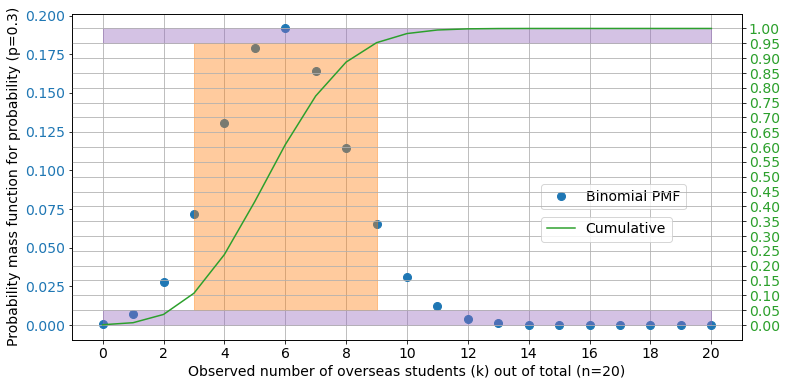

In [11]:
nStudents = 20
nOverseas = 3
cl = 0.90

x = range(nStudents+1) # list of integers from 0 to nStudents
n = nStudents
p = 0.3                # example probability
limlow = (1-cl)/2      # lower limit of central confidence interval
limhigh = 1-limlow     # upper limit of central confidence interval
rv = binom(n, p)       # initialise binomial distribution
probs = rv.pmf(x)      # calculate binomial probabilities for all values of x and return list
ints = np.cumsum(probs, dtype=float) # calculate cumulative sum of probabilities

# work out limits of confidence interval based on cumulative sum of probabilities
x_low = 0
x_high = nStudents
for i in x:
    if ints[i]<limlow: x_low = i
    if ints[n-i]>limhigh: x_high = n-i
if 0 == x_low and ints[0] > limlow: x_low = 0
else: x_low += 1


# prepare two plots with common x axis
fig,ax1 = plt.subplots(figsize=(12,6))
ax1.set_xticks(x[0::2])
ax2 = ax1.twinx()

# draw two bands indicating the excluded part of the confidence level
pp = PatchCollection([Rectangle((0,0),n,limlow),Rectangle((0,limhigh),n,limlow)],alpha=0.4, color='tab:purple')

# draw a rectangle indicating the selected confidence interval
pp2 = PatchCollection([Rectangle((x_low,limlow),x_high-x_low,cl)],alpha=0.4, color='tab:orange')

# add these to the plot
ax2.add_collection(pp)
ax2.add_collection(pp2)

# plot the probability distribution
ax1.plot(x,probs, 'bo', ms=8, label='Binomial PMF', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc=[0.7,0.4])

# plot the cumulative integral
ax2.plot(x,ints, '-', ms=8, label='Cumulative', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc=[0.7,0.3])

# plot optics
ax2.set_yticks([x/20. for x in range(21)])
ax1.grid(which='both',axis='x')
ax2.grid(which='major',axis='y')
ax1.set_xlabel('Observed number of overseas students (k) out of total (n=20)')
ax1.set_ylabel('Probability mass function for probability (p=0.3)')
plt.show()


The following three plots show the construction of the confidence belt first separated in one-sided intervals, which satisfy the inequalities discussed above, and finally their intersection.
The color shows the variation of the confidence level covered, which illustrates the steps.

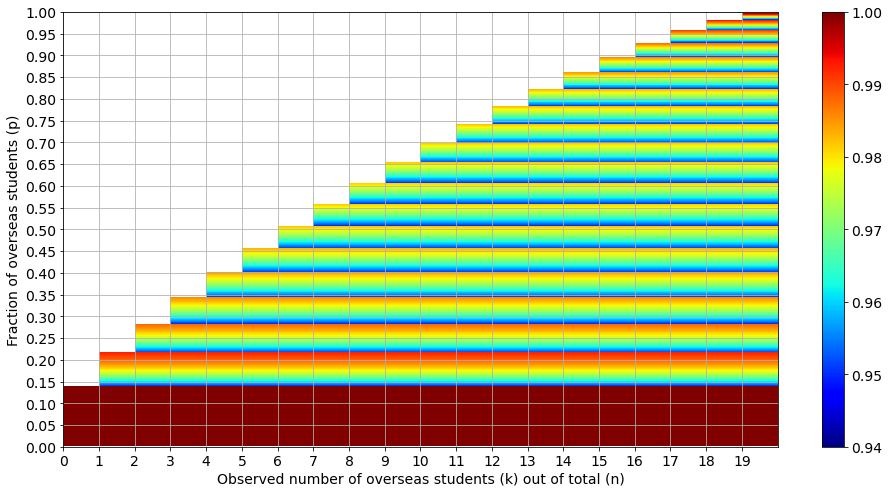

In [6]:
def get_higher_interval(cl, n, p):
    # calculate r- and r+ based on pre-defined functions
    rm = binom.ppf(0.5*(1-cl)     , n, p)
    rp = n
    if rm > 0: 
        return rm, rp, binom.cdf(rp,n,p)-binom.cdf(rm-1,n,p)
    else:
        return rm, rp, binom.cdf(rp,n,p)


nSamples = 1000 # defines granularity in y (=probability)
binom_patches = []
binom_colors = []
for i in range(1,nSamples):
    pOverseas = 1. * i / nSamples # translate into probability
    #rm, rp = get_central_interval_details(0.95, nStudents, pOverseas) # use detailed calculation
    rm, rp, p = get_higher_interval(cl, nStudents, pOverseas) # use fast implementation
    binom_patches.append( Rectangle((rm,pOverseas),rp-rm,1./nSamples) ) # define drawing object for confidence interval
    binom_colors.append(p)
binoms = PatchCollection(binom_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
binoms.set_array(np.array(binom_colors))
binoms.set_clim([0.94, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,nStudents) # set x axis range
ax.set_ylim(0,1)         # set y axis range

ax.add_collection(binoms) # draw belt

# plot optics
ax.set_yticks([x/20. for x in range(21)])
ax.set_xticks([x for x in range(nStudents)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed number of overseas students (k) out of total (n)')
ax.set_ylabel('Fraction of overseas students (p)')

plt.colorbar(binoms)
plt.show()

The plot above can be read from bottom to top, i.e. with increasing $p$, as the lower edge of the interval stepping to the right as soon as the resulting coverage exceeds $0.95$. Therefore, it always reaches $0.95$ at the bottom of a band of the same $k$.

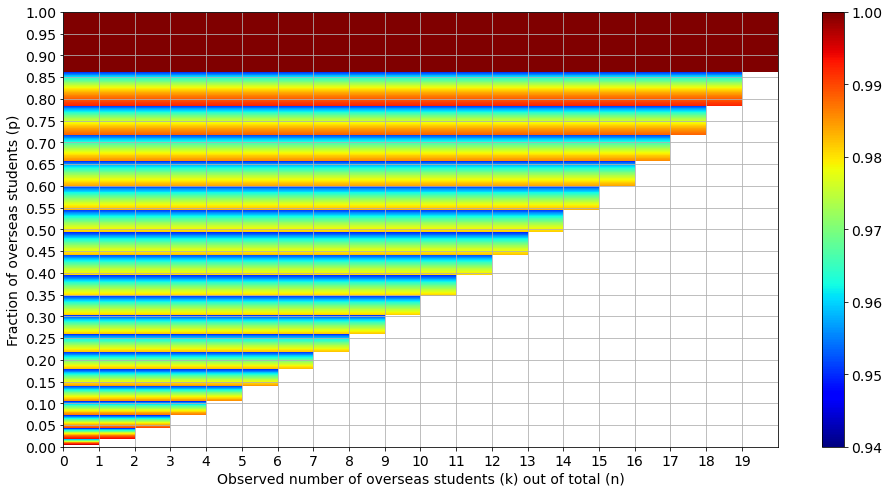

In [7]:
def get_lower_interval(cl, n, p):
    # calculate r- and r+ based on pre-defined functions
    rm = 0
    rp = binom.ppf(0.5*(1-cl) + cl, n, p)
    if rm > 0: 
        return rm, rp, binom.cdf(rp,n,p)-binom.cdf(rm-1,n,p)
    else:
        return rm, rp, binom.cdf(rp,n,p)
    
nSamples = 1000 # defines granularity in y (=probability)
binom_patches = []
binom_colors = []
for i in range(1,nSamples):
    pOverseas = 1. * i / nSamples # translate into probability
    rm, rp, p = get_lower_interval(cl, nStudents, pOverseas) # use fast implementation
    binom_patches.append( Rectangle((rm,pOverseas),rp-rm,1./nSamples) ) # define drawing object for confidence interval
    binom_colors.append(p)
binoms = PatchCollection(binom_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
binoms.set_array(np.array(binom_colors))
binoms.set_clim([0.94, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,nStudents) # set x axis range
ax.set_ylim(0,1)         # set y axis range

ax.add_collection(binoms) # draw belt

# plot optics
ax.set_yticks([x/20. for x in range(21)])
ax.set_xticks([x for x in range(nStudents)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed number of overseas students (k) out of total (n)')
ax.set_ylabel('Fraction of overseas students (p)')

plt.colorbar(binoms)
plt.show()


The plot above can be read from bottom to top, i.e. with increasing $p$, as the upper edge of the interval stepping to the right as soon as the resulting coverage would otherwise drop below $0.95$. Therefore, it always reaches $0.95$ at the top of a band of the same $k$.

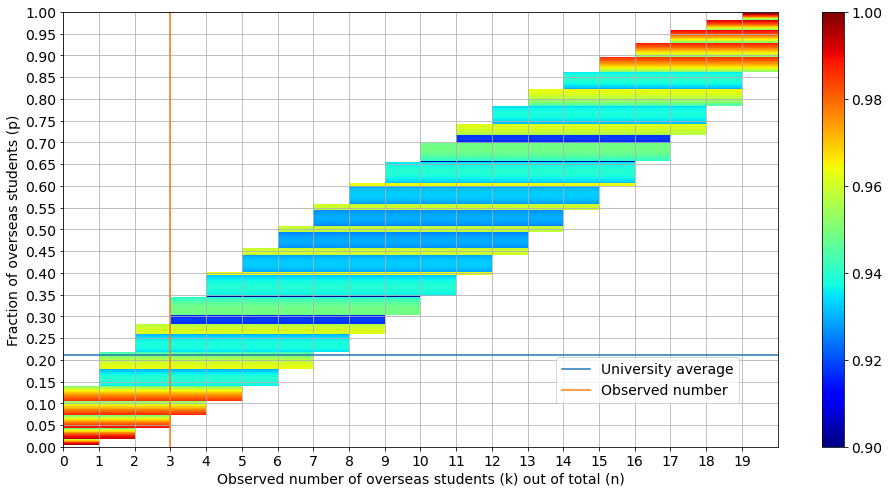

In [8]:
def get_central_interval(cl, n, p):
    # calculate r- and r+ based on pre-defined functions
    rm = binom.ppf(0.5*(1-cl)     , n, p)
    rp = binom.ppf(0.5*(1-cl) + cl, n, p)
    if rm > 0: 
        return rm, rp, binom.cdf(rp,n,p)-binom.cdf(rm-1,n,p)
    else:
        return rm, rp, binom.cdf(rp,n,p)

nSamples = 1000 # defines granularity in y (=probability)
binom_patches = []
binom_colors = []
for i in range(1,nSamples):
    pOverseas = 1. * i / nSamples # translate into probability
    #rm, rp = get_central_interval_details(0.95, nStudents, pOverseas) # use detailed calculation
    rm, rp, p = get_central_interval(cl, nStudents, pOverseas) # use fast implementation
    binom_patches.append( Rectangle((rm,pOverseas),rp-rm,1./nSamples) ) # define drawing object for confidence interval
    binom_colors.append(p)
binoms = PatchCollection(binom_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
binoms.set_array(np.array(binom_colors))
binoms.set_clim([0.9, 1])
#binoms = PatchCollection(binom_patches, alpha=0.5, color='tab:purple') # drawing object for complete belt

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,nStudents) # set x axis range
ax.set_ylim(0,1)         # set y axis range

ax.add_collection(binoms) # draw belt

# plot optics
ax.set_yticks([x/20. for x in range(21)])
ax.set_xticks([x for x in range(nStudents)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed number of overseas students (k) out of total (n)')
ax.set_ylabel('Fraction of overseas students (p)')


# reality check
ax.plot([0,nStudents],[0.21]*2, label='University average') # Based on 5770/27500 from latest Facts and Figures
ax.plot([nOverseas]*2,[0,1], label='Observed number')
ax.legend(loc=[0.69,0.10])

plt.colorbar(binoms)
plt.show()


#### 9.3.2 Poisson confidence intervals

The procedure for a Poisson process is rather similar to that of a Binomial distribution with the main difference that the range of possible values is not limited by a total number but goes to infinity (this is exactly how the distribution is defined, by taking the $n\to\infty$ limit of the Binomial distribution function).

##### Recall the Poisson distribution

For a given number of observed events $k$ and an expectation value of $\lambda$, the Poisson probability is given by

$$P(k;\lambda)=\frac{e^{-\lambda}\lambda^k}{k!}.$$

##### Construction of Poisson intervals

To construct central 90% intervals, we need the greatest value of $N_-$ that satisfies for a given $\lambda$

$$\sum_{k=N_-}^\infty P(k;\lambda)\geq 0.95.$$

This is equivalent to

$$\sum_{k=0}^{N_--1} P(k;\lambda) \leq 1 - 0.95 = 0.05,$$

which is easier to calculate.

Accordingly, we require the smallest $N_+$ that satisfies for a given $\lambda$

$$\sum_{k=0}^{N_+} P(k;\lambda) \geq 0.95.$$

##### Practical example

One useful number to remember is the 90% upper limit for the case that the number of observed events is 0; this limit is $\lambda_+=2.3$. Hence, in any counting experiment that yields an obervation of 0, we can be 90% sure that the true number of events is no greater than $2.3$.

The 90% upper limit corresponds to the left-hand side of an 80% central-interval belt. This is shown below where the $2.3$ can be read off as the top of the belt at its left-hand end at $k=0$.

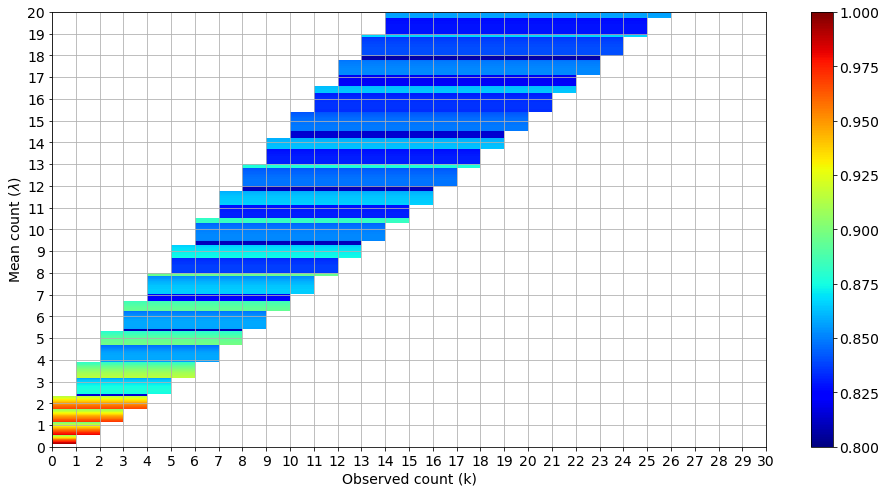

In [9]:
def get_central_interval(cl, l):
    # calculate r- and r+ based on pre-defined functions
    km = poisson.ppf(0.5*(1-cl)     , l)
    kp = poisson.ppf(0.5*(1-cl) + cl, l)
    if km > 0: 
        return km, kp, poisson.cdf(kp,l)-poisson.cdf(km-1,l)
    else:
        return km, kp, poisson.cdf(kp,l)

cl = 0.8
nSamples = 1000 # defines granularity in y (=probability)
poisson_patches = []
poisson_colors = []
max_mean = 20.
max_x = 30
for i in range(1,nSamples):
    mean = max_mean * i / nSamples # translate into probability
    km, kp, p = get_central_interval(cl, mean) # use fast implementation
    poisson_patches.append( Rectangle((km,mean),kp-km,max_mean/nSamples) ) # define drawing object for confidence interval
    poisson_colors.append(p)
poissons = PatchCollection(poisson_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
poissons.set_array(np.array(poisson_colors))
poissons.set_clim([0.8, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(poissons) # draw belt

# plot optics
ax.set_yticks([max_mean*x/20. for x in range(21)])
ax.set_xticks([x for x in range(max_x+1)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed count (k)')
ax.set_ylabel('Mean count ($\lambda$)')

plt.colorbar(poissons)
plt.show()


<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>